In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_show(image_path):
    """
    Display an image (local or URL) inside Jupyter/Colab using matplotlib.
    """

    # Check if it's a web URL
    if image_path.startswith("http://") or image_path.startswith("https://"):
        response = requests.get(image_path)
        image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
        img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    else:
        img = cv2.imread(image_path)

    if img is None:
        raise ValueError(f"Could not load image from {image_path}")

    # Convert from BGR (OpenCV) to RGB for correct colors
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Show image in notebook
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

### Predict with nano model

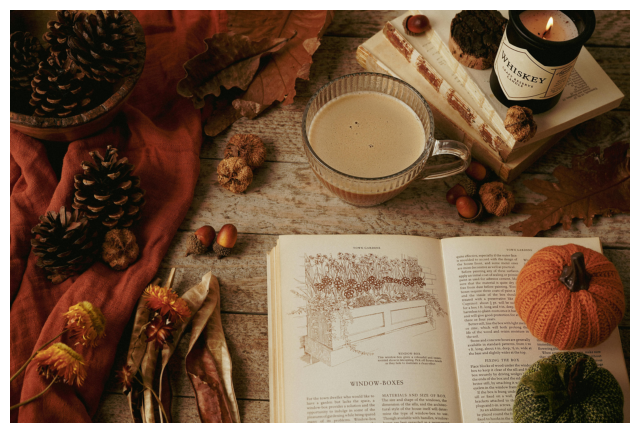


0: 448x640 1 bowl, 1 dining table, 1 book, 1 teddy bear, 1.8ms
Speed: 1.4ms preprocess, 1.8ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)
bowl (0.49)
teddy bear (0.45)
book (0.29)
dining table (0.28)


AttributeError: 'Results' object has no attribute 'startswith'. See valid attributes below.

    A class for storing and manipulating inference results.

    This class provides comprehensive functionality for handling inference results from various
    Ultralytics models, including detection, segmentation, classification, and pose estimation.
    It supports visualization, data export, and various coordinate transformations.

    Attributes:
        orig_img (np.ndarray): The original image as a numpy array.
        orig_shape (tuple[int, int]): Original image shape in (height, width) format.
        boxes (Boxes | None): Detected bounding boxes.
        masks (Masks | None): Segmentation masks.
        probs (Probs | None): Classification probabilities.
        keypoints (Keypoints | None): Detected keypoints.
        obb (OBB | None): Oriented bounding boxes.
        speed (dict): Dictionary containing inference speed information.
        names (dict): Dictionary mapping class indices to class names.
        path (str): Path to the input image file.
        save_dir (str | None): Directory to save results.

    Methods:
        update: Update the Results object with new detection data.
        cpu: Return a copy of the Results object with all tensors moved to CPU memory.
        numpy: Convert all tensors in the Results object to numpy arrays.
        cuda: Move all tensors in the Results object to GPU memory.
        to: Move all tensors to the specified device and dtype.
        new: Create a new Results object with the same image, path, names, and speed attributes.
        plot: Plot detection results on an input RGB image.
        show: Display the image with annotated inference results.
        save: Save annotated inference results image to file.
        verbose: Return a log string for each task in the results.
        save_txt: Save detection results to a text file.
        save_crop: Save cropped detection images to specified directory.
        summary: Convert inference results to a summarized dictionary.
        to_df: Convert detection results to a Polars Dataframe.
        to_json: Convert detection results to JSON format.
        to_csv: Convert detection results to a CSV format.

    Examples:
        >>> results = model("path/to/image.jpg")
        >>> result = results[0]  # Get the first result
        >>> boxes = result.boxes  # Get the boxes for the first result
        >>> masks = result.masks  # Get the masks for the first result
        >>> for result in results:
        >>>     result.plot()  # Plot detection results
    

In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests
from io import BytesIO

# Load YOLOv8 nano model (pretrained on COCO)
model = YOLO("yolov8n.pt")

# Download the image from URL
url = "https://images.pexels.com/photos/33771131/pexels-photo-33771131.jpeg"
image_show(url)
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("RGB")

# Run inference
results = model.predict(source=img, show=True)  # show=True opens result window

# Print detected objects
for result in results:
    boxes = result.boxes
    for box in boxes:
        cls_id = int(box.cls[0])
        conf = float(box.conf[0])
        label = model.names[cls_id]
        print(f"{label} ({conf:.2f})")


### Predict with s model

In [14]:
model = YOLO("yolov8s.pt")


In [ ]:
img_path="https://www.pexels.com/photo/child-scooting-on-urban-street-in-sao-paulo-34543238/"

### Run prediction on a local or web image with yolo s model


0: 640x384 10 persons, 1 traffic light, 1 skateboard, 16.4ms
Speed: 1.1ms preprocess, 16.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 384)


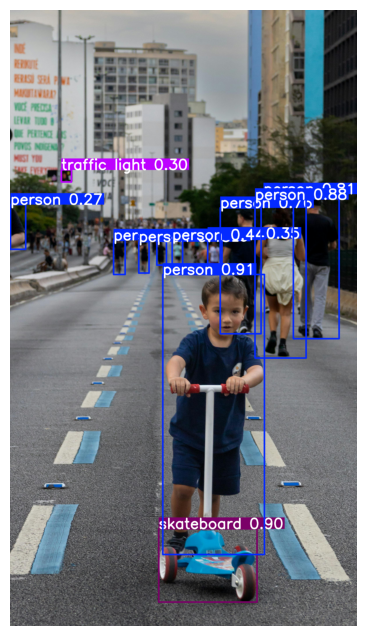

In [17]:
from PIL import Image
import requests
from io import BytesIO
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLOv8 small model
model = YOLO("yolov8s.pt")

# ✅ Direct image URL (not page URL)
image_url = "https://images.pexels.com/photos/34543238/pexels-photo-34543238.jpeg"

# Load image
response = requests.get(image_url)
img = Image.open(BytesIO(response.content)).convert("RGB")

# Run inference
results = model.predict(source=img, save=False, conf=0.25)

# Plot result
annotated_img = results[0].plot()[:, :, ::-1]  # BGR→RGB
plt.figure(figsize=(10, 8))
plt.imshow(annotated_img)
plt.axis("off")
plt.show()


### Display image with bounding boxes in the notebook

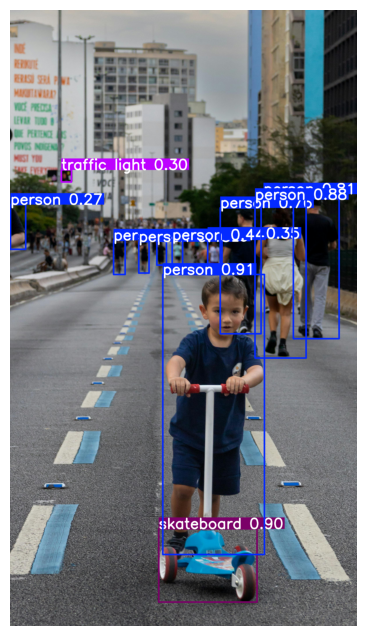

In [18]:
import matplotlib.pyplot as plt

# Plot result with bounding boxes
annotated_img = results[0].plot()  # returns a NumPy array (BGR)
annotated_img = annotated_img[:, :, ::-1]  # convert BGR → RGB for correct colors

plt.figure(figsize=(10, 8))
plt.imshow(annotated_img)
plt.axis("off")
plt.show()

### Run with M model


0: 640x384 10 persons, 1 traffic light, 1 skateboard, 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 384)


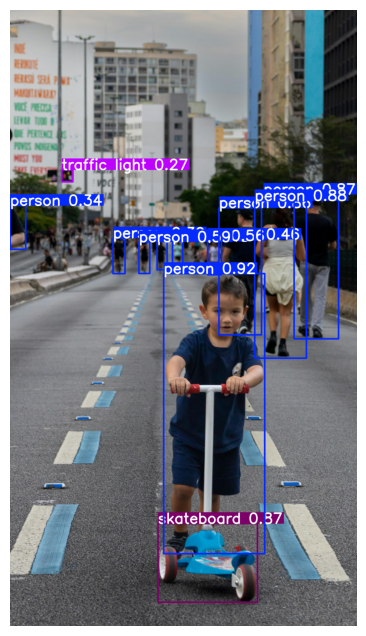

In [27]:
from PIL import Image
import requests
from io import BytesIO
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLOv8 small model
model = YOLO("yolov8m.pt")

# ✅ Direct image URL (not page URL)
image_url = "https://images.pexels.com/photos/34543238/pexels-photo-34543238.jpeg"

# Load image
response = requests.get(image_url)
img = Image.open(BytesIO(response.content)).convert("RGB")

# Run inference
results = model.predict(source=img, save=False, conf=0.25)

# Plot result
annotated_img = results[0].plot()[:, :, ::-1]  # BGR→RGB
plt.figure(figsize=(10, 8))
plt.imshow(annotated_img)
plt.axis("off")
plt.show()


### detect only specific objects such as vehicles
https://as1.ftcdn.net/v2/jpg/01/26/61/62/1000_F_126616293_rpRrEdTPBT23B5aJIcmyIFpLBd7nzN0g.jpg


In [22]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [23]:
def detect_only_vehicles(img_path):

    # Load YOLOv8 model (pretrained on COCO)
    model = YOLO("yolov8s.pt")

    # Run inference
    results = model.predict(source=img_path, conf=0.3)

    # Define classes you care about
    allowed_classes = ['car', 'bus', 'truck', 'motorbike', 'bicycle', 'traffic light']

    # Plot manually filtered results
    annotated_img = results[0].orig_img.copy()

    for box in results[0].boxes:
        cls_id = int(box.cls[0])
        label = model.names[cls_id]
        conf = float(box.conf[0])
        
        if label in allowed_classes:
            # Draw bounding boxes
            xyxy = box.xyxy[0].cpu().numpy().astype(int)
            x1, y1, x2, y2 = xyxy
            cv2.rectangle(annotated_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(annotated_img, f"{label} {conf:.2f}", (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()



image 1/1 /home/sachchida/gitrepo/computervision/vehicles.jpg: 448x640 16 cars, 1 bus, 1 truck, 2.3ms
Speed: 0.7ms preprocess, 2.3ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)


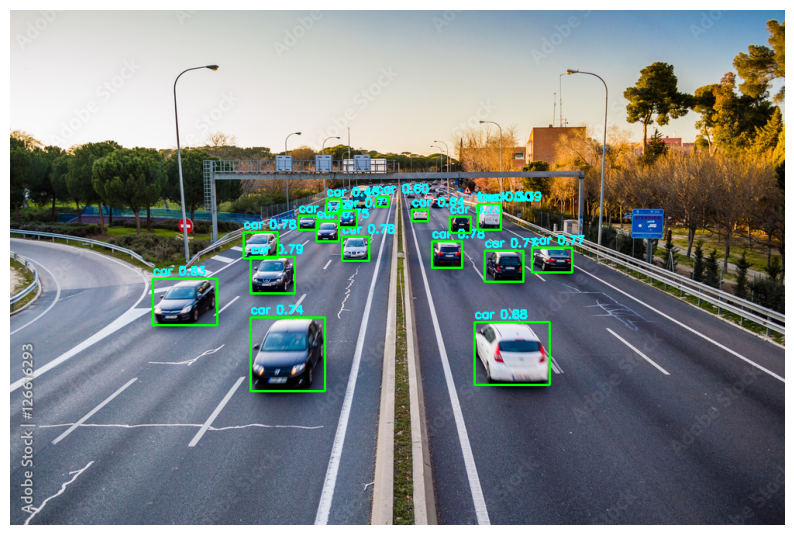

In [24]:
detect_only_vehicles("/home/sachchida/gitrepo/computervision/vehicles.jpg")


image 1/1 /home/sachchida/gitrepo/computervision/india_traffic.png: 416x640 11 persons, 19 cars, 3 motorcycles, 5 buss, 3 trucks, 14.3ms
Speed: 0.6ms preprocess, 14.3ms inference, 5.4ms postprocess per image at shape (1, 3, 416, 640)


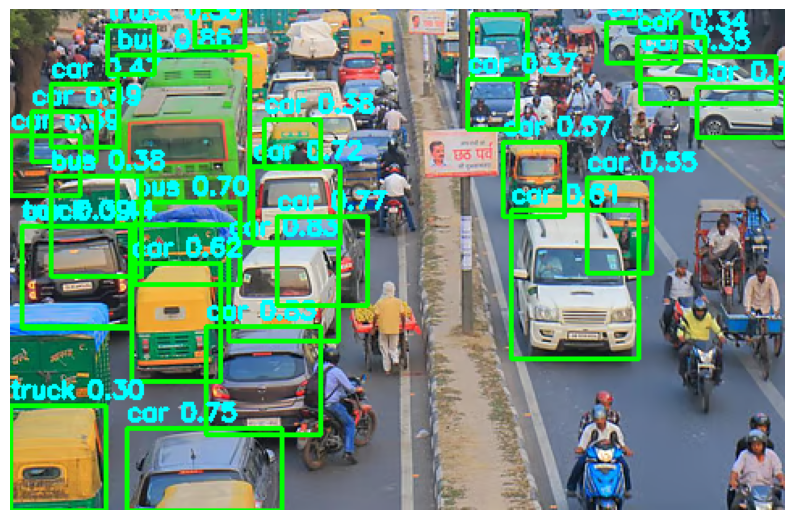

In [25]:
detect_only_vehicles("/home/sachchida/gitrepo/computervision/india_traffic.png")

In [26]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
print("✅ Detectron2 installed successfully!")

ModuleNotFoundError: No module named 'detectron2'